<a href="https://colab.research.google.com/github/abiyasa05/PCVK_Ganjil_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TUGAS PRAKTIKUM**

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah digunakan pada praktikum minggu lalu, rename file menjadi “Week10.ipynb”.

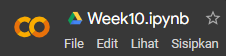

Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas

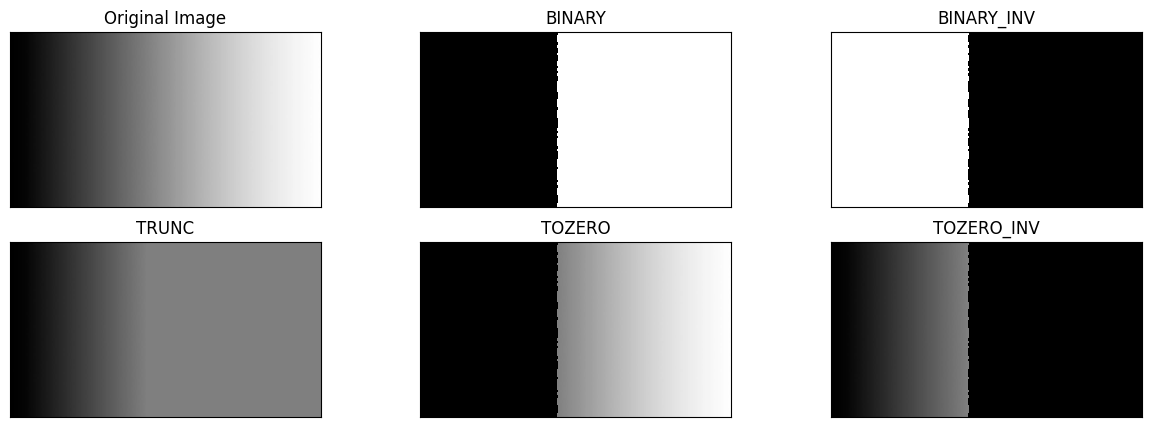

In [4]:
# Code Berikut menunjukkan penggunaan dari library OpenCV cv.Threshold

filename = ('/content/drive/MyDrive/PCVK/Images/gradient.jpg')
img = cv.imread(filename)
thresh = 127 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
 plt.subplot(2,3,i+1), plt.imshow(images[i], 'gray', interpolation='nearest')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

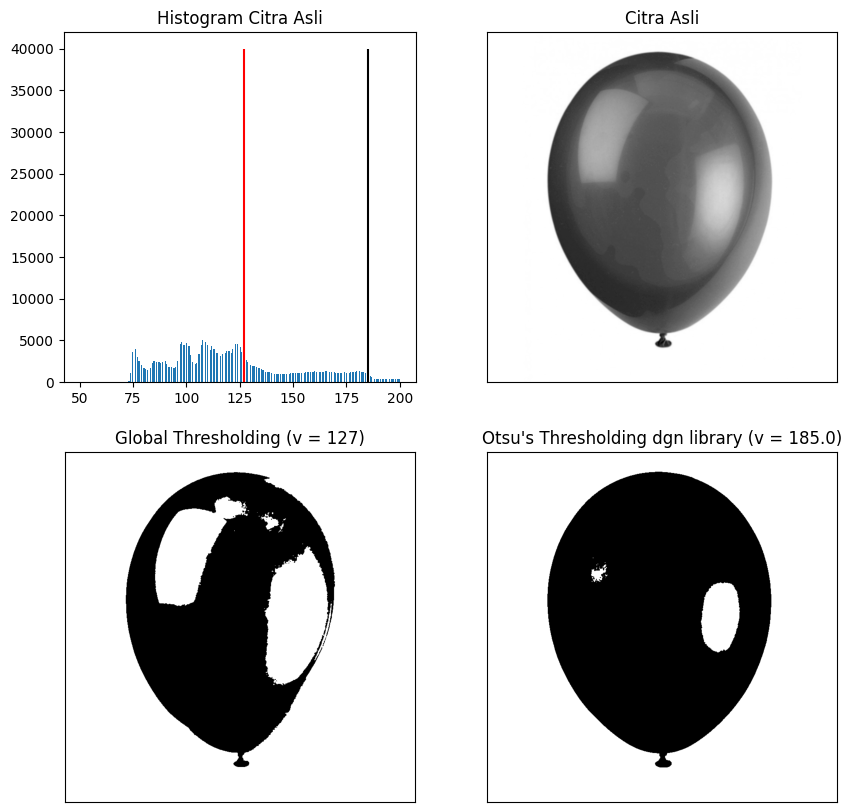

In [6]:
# Berikut adalah code contoh penggunaan Otsu’s dengan library OpenCV.

# Dengan Library
filename = ('/content/drive/MyDrive/PCVK/Images/balloon.jpg')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
thresh = 127
ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red') #garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black') #garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')
for i in range(len(citra3)):
 plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.
Petunjuk:

   a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.

   b. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html

   c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset **None**, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking **warna putih** yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan **Citra Segment**).


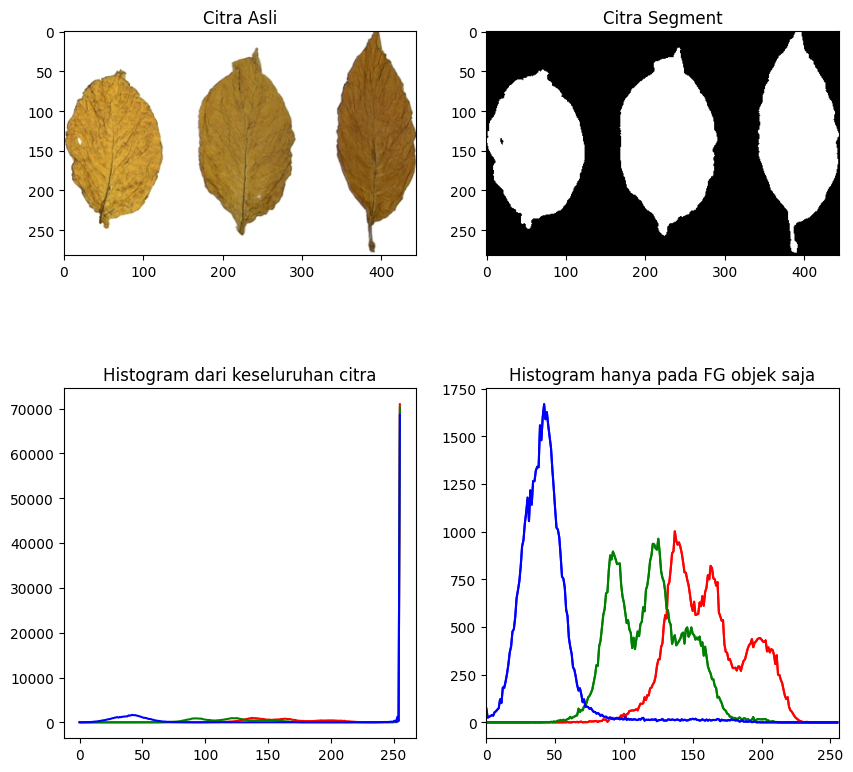

In [7]:
filename_3 = ('/content/drive/MyDrive/PCVK/Images/tobacco.jpg')
img_l = cv.imread(filename_3)
img_rgb = cv.cvtColor(img_l,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_rgb,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang
kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

(<Axes: >, <matplotlib.image.AxesImage at 0x7a68847f0dc0>)

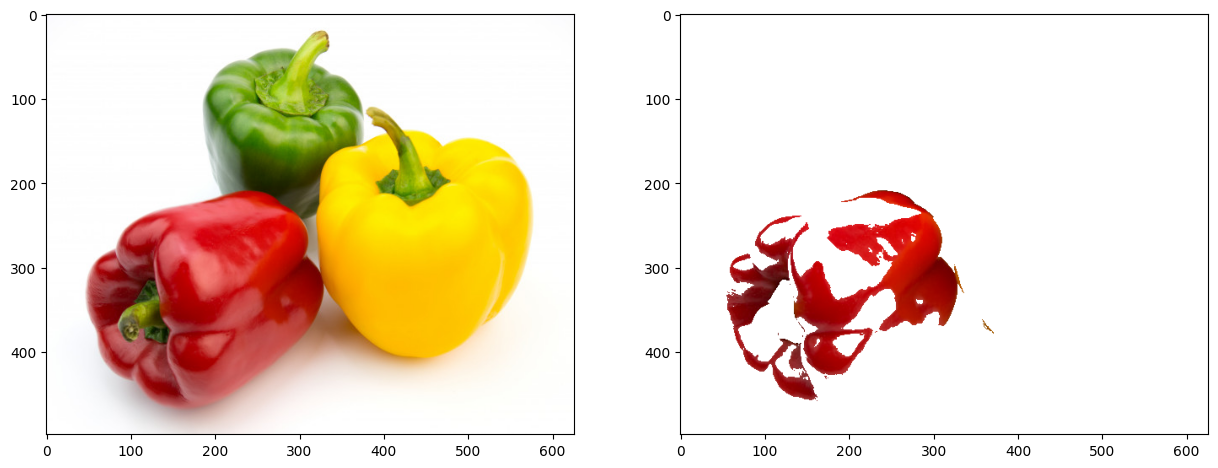

In [8]:
filename_4 = ('/content/drive/MyDrive/PCVK/Images/peppers.jpg')
img_p = cv.imread(filename_4)
img_rgb2 = cv.cvtColor(img_p,cv.COLOR_BGR2RGB)

pixel_values = img_rgb2.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu banyak pergeseran posisi antara interasi sekarang dengan iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka kita akan hentikan iterasi saat jumlah iterasi = 100 atau epsilon(selisih antara posisi centroid skrg dgn posisi centroid di iterasi sebelumnya) <0.2

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan putih/orange). Untuk percobaan ini kita akan gunakan 3 cluster untuk image ini

k = 6
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# konversi titik centroid ke dalam integer
centers = np.uint8(centers)

# flattening label array
labels = labels.flatten()

masked_image = np.copy(img_rgb2)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img_rgb2.shape)

plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img_rgb2)
plt.subplot(2,2,2),plt.imshow(masked_image0)

7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda
pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code
dan hasil image di modul ini.

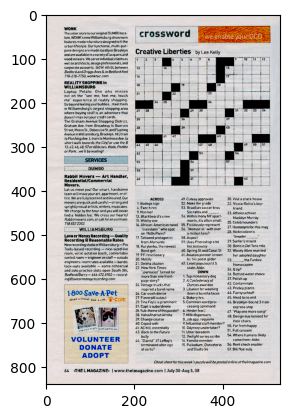

In [9]:
img_c = cv.imread('/content/drive/MyDrive/PCVK/Images/crossword.jpg')
img_rgb3 = cv.cvtColor(img_c, cv.COLOR_BGR2RGB)

ret, thresh = cv.threshold(img_rgb3, 125, 255, cv.THRESH_TOZERO)

plt.imshow(thresh)
cv.waitKey(0)
cv.destroyAllWindows()